## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [2]:
cc_data = pd.read_csv('../raw_data/fraudTrain_cleaned.csv', index_col=0)

/Users/chrischung/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
cc_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,city_pop,job,dob,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,3495,"Psychologist, counselling",1988-03-09,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,149,Special educational needs teacher,1978-06-21,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,4154,Nature conservation officer,1962-01-19,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,1939,Patent attorney,1967-01-12,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,99,Dance movement psychotherapist,1986-03-28,0


In [4]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296569 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296569 non-null  object 
 1   cc_num                 1296569 non-null  int64  
 2   merchant               1296569 non-null  object 
 3   category               1296569 non-null  object 
 4   amt                    1296569 non-null  float64
 5   first                  1296569 non-null  object 
 6   last                   1296569 non-null  object 
 7   gender                 1296569 non-null  object 
 8   street                 1296569 non-null  object 
 9   city                   1296569 non-null  object 
 10  state                  1296569 non-null  object 
 11  zip                    1296569 non-null  int64  
 12  city_pop               1296569 non-null  int64  
 13  job                    1296569 non-null  object 
 14  dob               

In [5]:
# Filter out 'street', 'city', 'zip' columns
cc_data.drop(['street', 'city', 'zip'], axis=1, inplace=True)

In [6]:
#Check dataframe
cc_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,state,city_pop,job,dob,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,NC,3495,"Psychologist, counselling",1988-03-09,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,WA,149,Special educational needs teacher,1978-06-21,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,ID,4154,Nature conservation officer,1962-01-19,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,MT,1939,Patent attorney,1967-01-12,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,VA,99,Dance movement psychotherapist,1986-03-28,0


In [7]:
#Subset dataset into fraud and valid datasets
cc_data_fraud = cc_data[cc_data['is_fraud']==1]
cc_data_valid = cc_data[cc_data['is_fraud']==0]

In [12]:
#Examine fraud data
cc_data_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7506 entries, 2449 to 1295733
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  7506 non-null   object 
 1   cc_num                 7506 non-null   int64  
 2   merchant               7506 non-null   object 
 3   category               7506 non-null   object 
 4   amt                    7506 non-null   float64
 5   first                  7506 non-null   object 
 6   last                   7506 non-null   object 
 7   gender                 7506 non-null   object 
 8   state                  7506 non-null   object 
 9   city_pop               7506 non-null   int64  
 10  job                    7506 non-null   object 
 11  dob                    7506 non-null   object 
 12  is_fraud               7506 non-null   int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 821.0+ KB


In [13]:
#Examine valid transactions
cc_data_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1289063 entries, 0 to 1296674
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1289063 non-null  object 
 1   cc_num                 1289063 non-null  int64  
 2   merchant               1289063 non-null  object 
 3   category               1289063 non-null  object 
 4   amt                    1289063 non-null  float64
 5   first                  1289063 non-null  object 
 6   last                   1289063 non-null  object 
 7   gender                 1289063 non-null  object 
 8   state                  1289063 non-null  object 
 9   city_pop               1289063 non-null  int64  
 10  job                    1289063 non-null  object 
 11  dob                    1289063 non-null  object 
 12  is_fraud               1289063 non-null  int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 137.7+ MB


In [ ]:
#Filter out more outliers from cc_data_valid

#cc_data_valid = cc_data_valid[cc_data_valid['amt']<=1500]
#cc_data_valid.head()

## Examine 'amt' column

Text(0.5, 1.0, 'Histogram of Fraud Transaction Amounts')

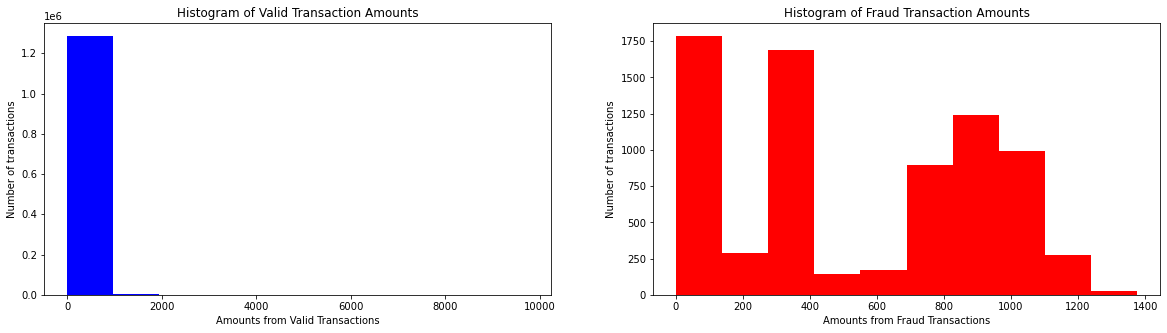

In [14]:
#Histogram of 'amt' column
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].hist(cc_data_valid['amt'], color = 'blue')
ax[1].hist(cc_data_fraud['amt'], color = 'red')

ax[0].set_xlabel('Amounts from Valid Transactions')
ax[0].set_ylabel('Number of transactions')
ax[0].set_title('Histogram of Valid Transaction Amounts')

ax[1].set_xlabel('Amounts from Fraud Transactions')
ax[1].set_ylabel('Number of transactions')
ax[1].set_title('Histogram of Fraud Transaction Amounts')

#Are histograms an effective way to visualize this column due to the unbalanced nature of fraud vs valid?

Text(0, 0.5, 'Amount')

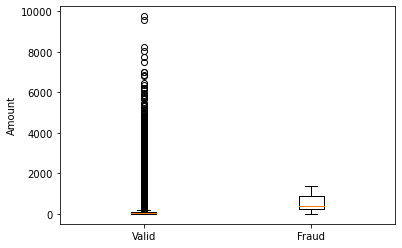

In [15]:
#Boxplots of 'amt' column
plt.boxplot([cc_data_valid['amt'], cc_data_fraud['amt']])
plt.xticks([1, 2], ['Valid', 'Fraud'])
plt.ylabel('Amount')

In [16]:
#Compare means of amounts for valid vs fraud.
valid_amt_mean = np.mean(cc_data_valid['amt'])
fraud_amt_mean = np.mean(cc_data_fraud['amt'])
print("Mean of valid transaction amounts:", valid_amt_mean)
print("Mean of fraud transaction amounts:", fraud_amt_mean)

Mean of valid transaction amounts: 66.88413217972892
Mean of fraud transaction amounts: 531.3200919264573


Even with large number of outliers from valid transactions, the mean of fraud transactions is still SIGNIFICANTLY higher than valid transactions.  The 'amt' column can definitely be a good predictor of fraud.  

Still, we will remove some outliers.

In [17]:
#Remove outliers 
cc_data = cc_data[cc_data['amt']<=1500]

#Reassign valid and fraud dataframes
cc_data_fraud = cc_data[cc_data['is_fraud']==1]
cc_data_valid = cc_data[cc_data['is_fraud']==0]

Text(0.5, 1.0, 'Histogram of Fraud Transaction Amounts')

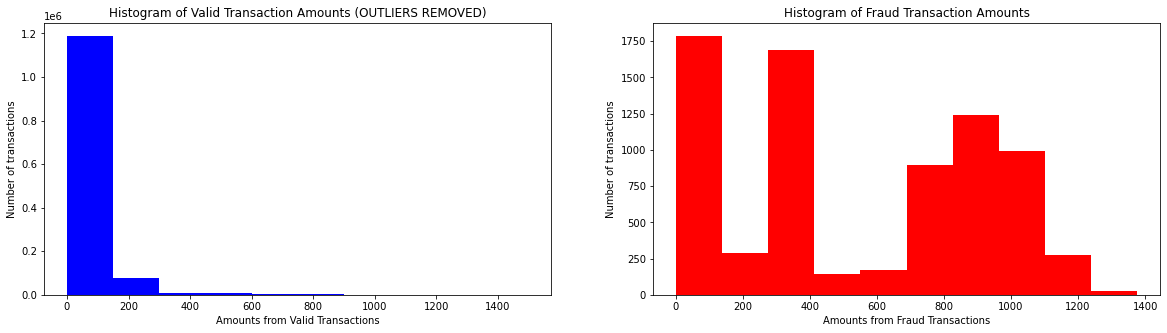

In [19]:
#Check histograms again
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].hist(cc_data_valid['amt'], color = 'blue')
ax[1].hist(cc_data_fraud['amt'], color = 'red')

ax[0].set_xlabel('Amounts from Valid Transactions')
ax[0].set_ylabel('Number of transactions')
ax[0].set_title('Histogram of Valid Transaction Amounts (OUTLIERS REMOVED)')

ax[1].set_xlabel('Amounts from Fraud Transactions')
ax[1].set_ylabel('Number of transactions')
ax[1].set_title('Histogram of Fraud Transaction Amounts')

Text(0, 0.5, 'Amount')

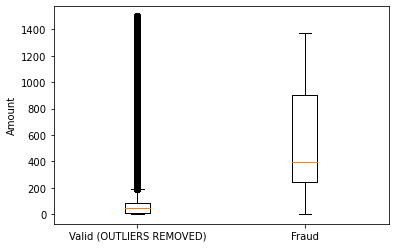

In [21]:
#Check boxplots again
plt.boxplot([cc_data_valid['amt'], cc_data_fraud['amt']])
plt.xticks([1, 2], ['Valid (OUTLIERS REMOVED)', 'Fraud'])
plt.ylabel('Amount')

## Examine 'city_pop' column

(array([6924.,  200.,  145.,   62.,   63.,   54.,    0.,    0.,   19.,
          39.]),
 array([2.3000000e+01, 2.9069070e+05, 5.8135840e+05, 8.7202610e+05,
        1.1626938e+06, 1.4533615e+06, 1.7440292e+06, 2.0346969e+06,
        2.3253646e+06, 2.6160323e+06, 2.9067000e+06]),
 <BarContainer object of 10 artists>)

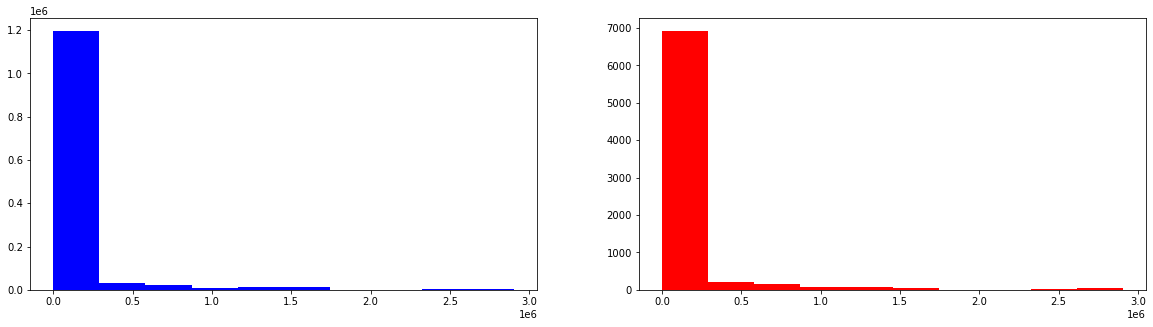

In [22]:
# Histogram of 'city_pop' column
fig, ax = plt.subplots(1,2, figsize = (20, 5))
ax[0].hist(cc_data_valid['city_pop'], color = 'blue')
ax[1].hist(cc_data_fraud['city_pop'], color = 'red')

Text(0, 0.5, 'City Population')

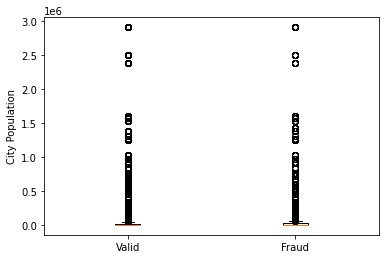

In [23]:
#Boxplot of 'city_pop' column
#Boxplots of 'amt' column
plt.boxplot([cc_data_valid['city_pop'], cc_data_fraud['city_pop']])
plt.xticks([1, 2], ['Valid', 'Fraud'])
plt.ylabel('City Population')

Not sure if we can extract any meaningful information from the 'city_pop' column.  They are too similar between valid and fraud transactions.  <b>Should we remove this column? <b/>

## Examine visualizations of 'category' variable (categorical)

#### Does the transaction category affect our target variable?

In [24]:
valid_cat_count = cc_data_valid['category'].value_counts().sort_index()
fraud_cat_count = cc_data_fraud['category'].value_counts().sort_index()

<ipython-input-25-a98afde5cca9>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(valid_cat_count.index, rotation=90)
<ipython-input-25-a98afde5cca9>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(fraud_cat_count.index, rotation=90)


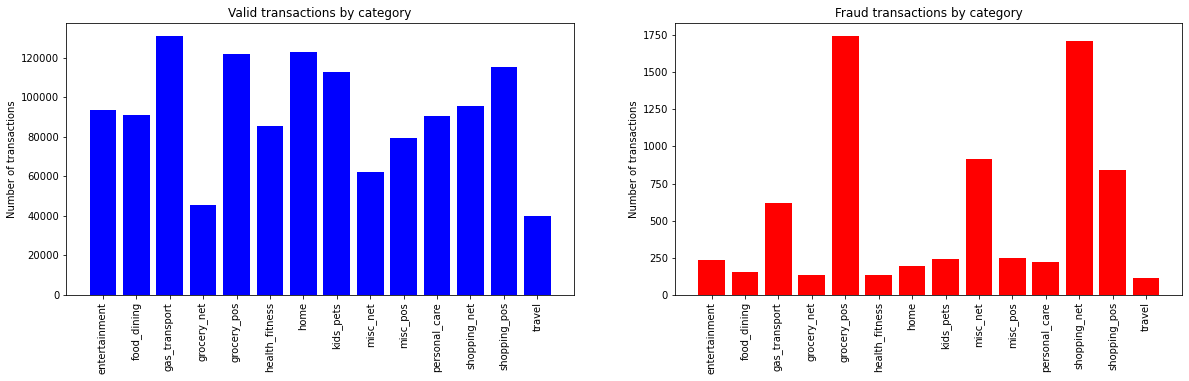

In [25]:
# Category column
fig, ax = plt.subplots(1, 2, figsize=(20,5))

ax[0].bar(valid_cat_count.index, valid_cat_count, color = 'blue')
ax[1].bar(fraud_cat_count.index, fraud_cat_count, color = 'red')

ax[0].set_xticklabels(valid_cat_count.index, rotation=90)
ax[0].set_ylabel('Number of transactions')
ax[0].set_title('Valid transactions by category')
ax[1].set_xticklabels(fraud_cat_count.index, rotation=90)
ax[1].set_ylabel('Number of transactions')
ax[1].set_title('Fraud transactions by category')

plt.show()


Valid transactions are spread out among categories, with a few that have significantly lower transactions (grocery_net, travel).

Fraud transactions are primarily in 'grocery_pos' and 'shopping_net' categories, with 'misc_net', 'shopping_pos', and 'gas_transport' as the next tier of transaction categories.  

'category' can be a decent predictor of fraud.

## One-hot encoding for 'category' variable

In [26]:
cat_dummies = pd.get_dummies(cc_data['category'],prefix='category')

In [28]:
# Concatenate one-hot encoded dataframes to main dataframe.
cc_data = pd.concat([cc_data, cat_dummies], axis=1)

In [29]:
# Check dataframe
cc_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,state,city_pop,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,NC,3495,...,0,0,0,0,1,0,0,0,0,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,WA,149,...,1,0,0,0,0,0,0,0,0,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,ID,4154,...,0,0,0,0,0,0,0,0,0,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,MT,1939,...,0,0,0,0,0,0,0,0,0,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,VA,99,...,0,0,0,0,0,1,0,0,0,0


In [30]:
#Redefine valid and fraud dataframes
cc_data_fraud = cc_data[cc_data['is_fraud']==1]
cc_data_valid = cc_data[cc_data['is_fraud']==0]

## Examine 'gender' column

Text(0.5, 1.0, 'Fraud transactions by gender')

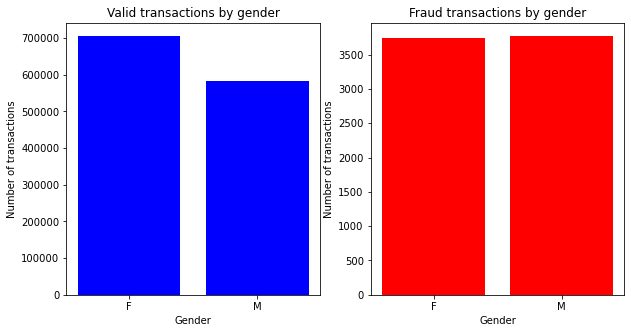

In [33]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].bar(cc_data_valid['gender'].value_counts().sort_index().index, cc_data_valid['gender'].value_counts().sort_index(), color = 'blue')
ax[1].bar(cc_data_fraud['gender'].value_counts().sort_index().index, cc_data_fraud['gender'].value_counts().sort_index(), color = 'red')

ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Number of transactions')
ax[0].set_title('Valid transactions by gender')

ax[1].set_xlabel('Gender')
ax[1].set_ylabel('Number of transactions')
ax[1].set_title('Fraud transactions by gender')

Does not seem like gender is a strong predictor of fraud.  We can remove this column.

In [34]:
# Filter out 'gender' column
cc_data.drop('gender', axis=1, inplace=True)

In [36]:
#Redefine valid and fraud dataframes
cc_data_fraud = cc_data[cc_data['is_fraud']==1]
cc_data_valid = cc_data[cc_data['is_fraud']==0]

## Examine 'state' column

In [37]:
#Check number of unique states from valid transactions
valid_state_count = cc_data_valid['state'].value_counts().sort_index()

In [38]:
# Check number of unique states from fraud transactions
fraud_state_count = cc_data_fraud['state'].value_counts().sort_index()

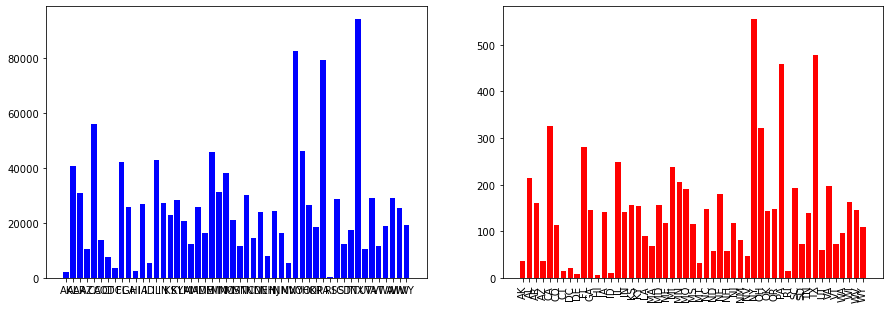

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Define bar width.
bar_width = 0.8

# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax[0].bar(valid_state_count.index, valid_state_count, width = bar_width, color = 'blue')
b2 = ax[1].bar(fraud_state_count.index, fraud_state_count, width = bar_width, color = 'red')

plt.xticks(rotation=90)
plt.show()

### Feature hashing the state column

In [40]:
from sklearn.feature_extraction import FeatureHasher

h = FeatureHasher(n_features = 10, input_type = 'string')

valid_hash = h.transform(cc_data['state']).toarray()
cc_data = pd.concat([cc_data, pd.DataFrame(valid_hash)], axis = 1)

In [41]:
#Check dataframe
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 36 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   trans_date_trans_time    1295379 non-null  object 
 1   cc_num                   1295379 non-null  float64
 2   merchant                 1295379 non-null  object 
 3   category                 1295379 non-null  object 
 4   amt                      1295379 non-null  float64
 5   first                    1295379 non-null  object 
 6   last                     1295379 non-null  object 
 7   state                    1295379 non-null  object 
 8   city_pop                 1295379 non-null  float64
 9   job                      1295379 non-null  object 
 10  dob                      1295379 non-null  object 
 11  is_fraud                 1295379 non-null  float64
 12  category_entertainment   1295379 non-null  float64
 13  category_food_dining     1295379 non-null 

In [42]:
#Redefine valid and fraud dataframes
cc_data_fraud = cc_data[cc_data['is_fraud']==1]
cc_data_valid = cc_data[cc_data['is_fraud']==0]

Transaction time
- time of day of transaction (grouped by morning, evening, night?)
- day of week of transaction

birthdate
- difference from transaction time for age

## Examining 'trans_date_trans_time' column

- convert trans_date_trans_time into datetime object
- separate transaction date and transaction time into separate columns (is this necessary?)
- make new column, extracting day of week from transaction date
- make new column, grouping transaction times into categories (morning, afternoon, evening)
- examine day of week
- examine transaction times

In [43]:
# Convert to datetime object
cc_data['trans_date_trans_time']=pd.to_datetime(cc_data['trans_date_trans_time'])

#Redefine valid and fraud dataframes
cc_data_fraud = cc_data[cc_data['is_fraud']==1]
cc_data_valid = cc_data[cc_data['is_fraud']==0]

In [45]:
#Check datatypes
cc_data_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287873 entries, 0 to 1296674
Data columns (total 36 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   trans_date_trans_time    1287873 non-null  datetime64[ns]
 1   cc_num                   1287873 non-null  float64       
 2   merchant                 1287873 non-null  object        
 3   category                 1287873 non-null  object        
 4   amt                      1287873 non-null  float64       
 5   first                    1287873 non-null  object        
 6   last                     1287873 non-null  object        
 7   state                    1287873 non-null  object        
 8   city_pop                 1287873 non-null  float64       
 9   job                      1287873 non-null  object        
 10  dob                      1287873 non-null  object        
 11  is_fraud                 1287873 non-null  float64       
 12  

In [46]:
cc_data_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7506 entries, 2449 to 1295733
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   trans_date_trans_time    7506 non-null   datetime64[ns]
 1   cc_num                   7506 non-null   float64       
 2   merchant                 7506 non-null   object        
 3   category                 7506 non-null   object        
 4   amt                      7506 non-null   float64       
 5   first                    7506 non-null   object        
 6   last                     7506 non-null   object        
 7   state                    7506 non-null   object        
 8   city_pop                 7506 non-null   float64       
 9   job                      7506 non-null   object        
 10  dob                      7506 non-null   object        
 11  is_fraud                 7506 non-null   float64       
 12  category_entertainment   750

In [47]:
#Get day of week, create new columns
cc_data['day_of_week'] = cc_data['trans_date_trans_time'].dt.dayofweek

#Redefine valid and fraud dataframes
cc_data_fraud = cc_data[cc_data['is_fraud']==1]
cc_data_valid = cc_data[cc_data['is_fraud']==0]

In [48]:
valid_dayofweek_count = cc_data_valid.groupby('day_of_week').count()
fraud_dayofweek_count = cc_data_fraud.groupby('day_of_week').count()

Text(0.5, 1.0, 'Fraud transactions by day of week')

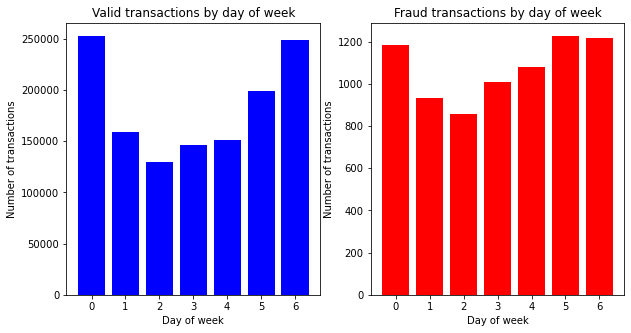

In [50]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

ax[0].bar(valid_dayofweek_count.index, valid_dayofweek_count['trans_date_trans_time'], color = 'blue')
ax[1].bar(fraud_dayofweek_count.index, fraud_dayofweek_count['trans_date_trans_time'], color = 'red')

ax[0].set_xlabel('Day of week')
ax[0].set_ylabel('Number of transactions')
ax[0].set_title('Valid transactions by day of week')

ax[1].set_xlabel('Day of week')
ax[1].set_ylabel('Number of transactions')
ax[1].set_title('Fraud transactions by day of week')

Most valid transactions happen on days 0, 5, and 6 (Monday, Saturday, and Sunday).

Similar pattern for fraud transactions, but not as much of a stark contrast between days.

Not sure if we can get much out of day of week.  Let's inspect the number of transactions for each month for valid vs fraud.

In [51]:
#Get month, create new column
cc_data['month'] = cc_data['trans_date_trans_time'].dt.month

#Redefine valid and fraud dataframes
cc_data_fraud = cc_data[cc_data['is_fraud']==1]
cc_data_valid = cc_data[cc_data['is_fraud']==0]

Text(0.5, 1.0, 'Fraud transactions by month')

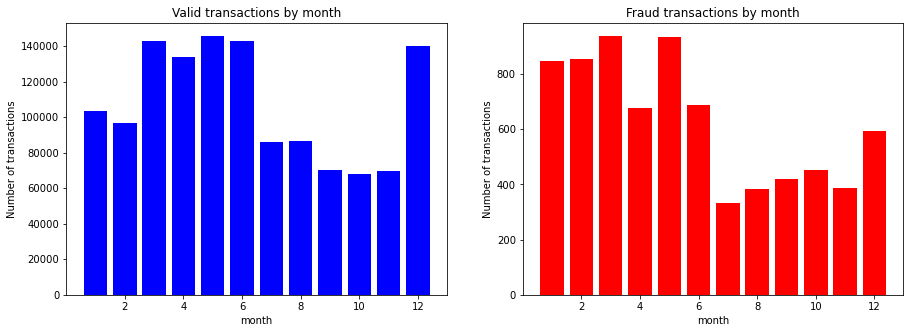

In [53]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].bar(cc_data_valid['month'].value_counts().sort_index().index, cc_data_valid['month'].value_counts().sort_index(), color = 'blue')
ax[1].bar(cc_data_fraud['month'].value_counts().sort_index().index, cc_data_fraud['month'].value_counts().sort_index(), color = 'red')

ax[0].set_xlabel('month')
ax[0].set_ylabel('Number of transactions')
ax[0].set_title('Valid transactions by month')

ax[1].set_xlabel('month')
ax[1].set_ylabel('Number of transactions')
ax[1].set_title('Fraud transactions by month')

Most valid transactions happen during:
- March
- April
- May
- June
- December

Most fraud transactions happen during
- January
- February
- March
- April
- May
- June
- December

Month could be a possible predictor of fraud transactions.

In [54]:
# Checking time of day (hour) of transactions
cc_data['hour'] = cc_data['trans_date_trans_time'].dt.hour

#Redefine valid and fraud dataframes
cc_data_fraud = cc_data[cc_data['is_fraud']==1]
cc_data_valid = cc_data[cc_data['is_fraud']==0]

Text(0.5, 1.0, 'Fraud transactions by hour of day')

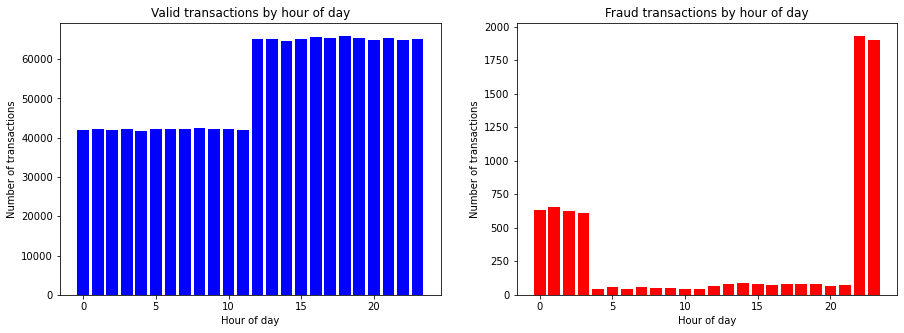

In [55]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].bar(cc_data_valid['hour'].value_counts().sort_index().index, cc_data_valid['hour'].value_counts().sort_index(), color = 'blue')
ax[1].bar(cc_data_fraud['hour'].value_counts().sort_index().index, cc_data_fraud['hour'].value_counts().sort_index(), color = 'red')

ax[0].set_xlabel('Hour of day')
ax[0].set_ylabel('Number of transactions')
ax[0].set_title('Valid transactions by hour of day')

ax[1].set_xlabel('Hour of day')
ax[1].set_ylabel('Number of transactions')
ax[1].set_title('Fraud transactions by hour of day')

Time of day is DEFINITELY a predictor of fraud transactions.  Most fraud transactions take place in the 22nd and 23 hour of the day (10 PM - 12 AM), then there's another group of fraud transactions taking place from the 0th hour to the 3rd hour of the day (12 AM - 4 AM)

## Examine 'dob' column

In [56]:
# Convert to datetime object
cc_data['dob']=pd.to_datetime(cc_data['dob'])

In [57]:
#create age column
cc_data['age'] = cc_data['trans_date_trans_time'].dt.year - cc_data['dob'].dt.year

In [58]:
#Redefine valid and fraud dataframes
cc_data_fraud = cc_data[cc_data['is_fraud']==1]
cc_data_valid = cc_data[cc_data['is_fraud']==0]

Text(0.5, 1.0, 'Fraud transactions by age')

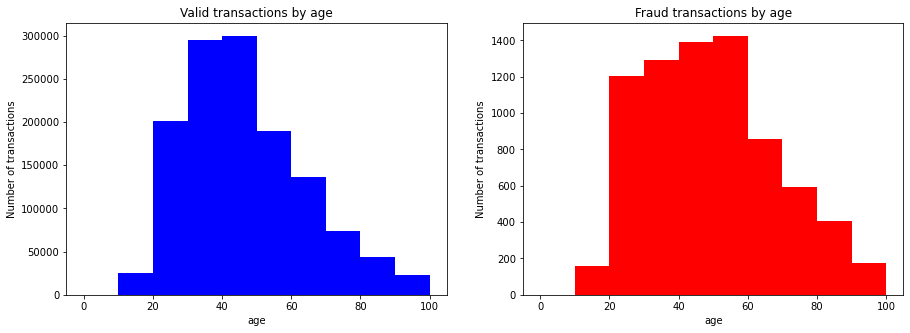

In [59]:
#check histograms
fig, ax = plt.subplots(1, 2, figsize=(15,5))

bins =[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

ax[0].hist(cc_data_valid['age'], color = 'blue', bins = bins)
ax[1].hist(cc_data_fraud['age'], color = 'red', bins = bins)

ax[0].set_xlabel('age')
ax[0].set_ylabel('Number of transactions')
ax[0].set_title('Valid transactions by age')

ax[1].set_xlabel('age')
ax[1].set_ylabel('Number of transactions')
ax[1].set_title('Fraud transactions by age')

Most fraud transactions are coming from customers whose age is from 20-60. Most valid transactions are from customers whose age is from 30-50. 

#### Good predictors of fraud
- 'amt'
- 'category'
- 'state'
- 'month'
- 'hour'
- 'age'

In [60]:
#save the data to a new csv file
cc_data.to_csv('../raw_data/fraudTrain_cleaned2.csv')